13.12.2020

### Image Processing Physics

#### Julia Herzen, Klaus Achterhold, Clemens Schmid, Manuel Schultheiss

# Exercise 6, Task 1: Counting stars

Today's question:
* How many stars are there in a particular image of the night sky?
* What are their apparent sizes?

Applied methods:
* Binary thresholding
* Morphological operations (opening, closing)
* Labeling and analysis of labeling results

## a) Preliminaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd

%matplotlib notebook
plt.rcParams["image.cmap"] = "gray"
plt.rcParams["image.interpolation"] = "none"

In [2]:
img = plt.imread('bears.jpg')
type(img)
img.dtype


dtype('uint8')

<IPython.core.display.Javascript object>


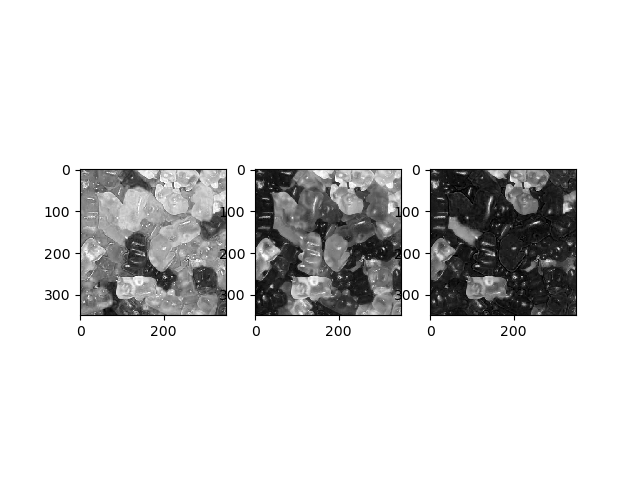

In [3]:
plt.figure()
plt.subplot(1,3,1)
plt.imshow(img[:,:,0])
plt.subplot(1,3,2)
plt.imshow(img[:,:,1])
plt.subplot(1,3,3)
plt.imshow(img[:,:,2])

<IPython.core.display.Javascript object>


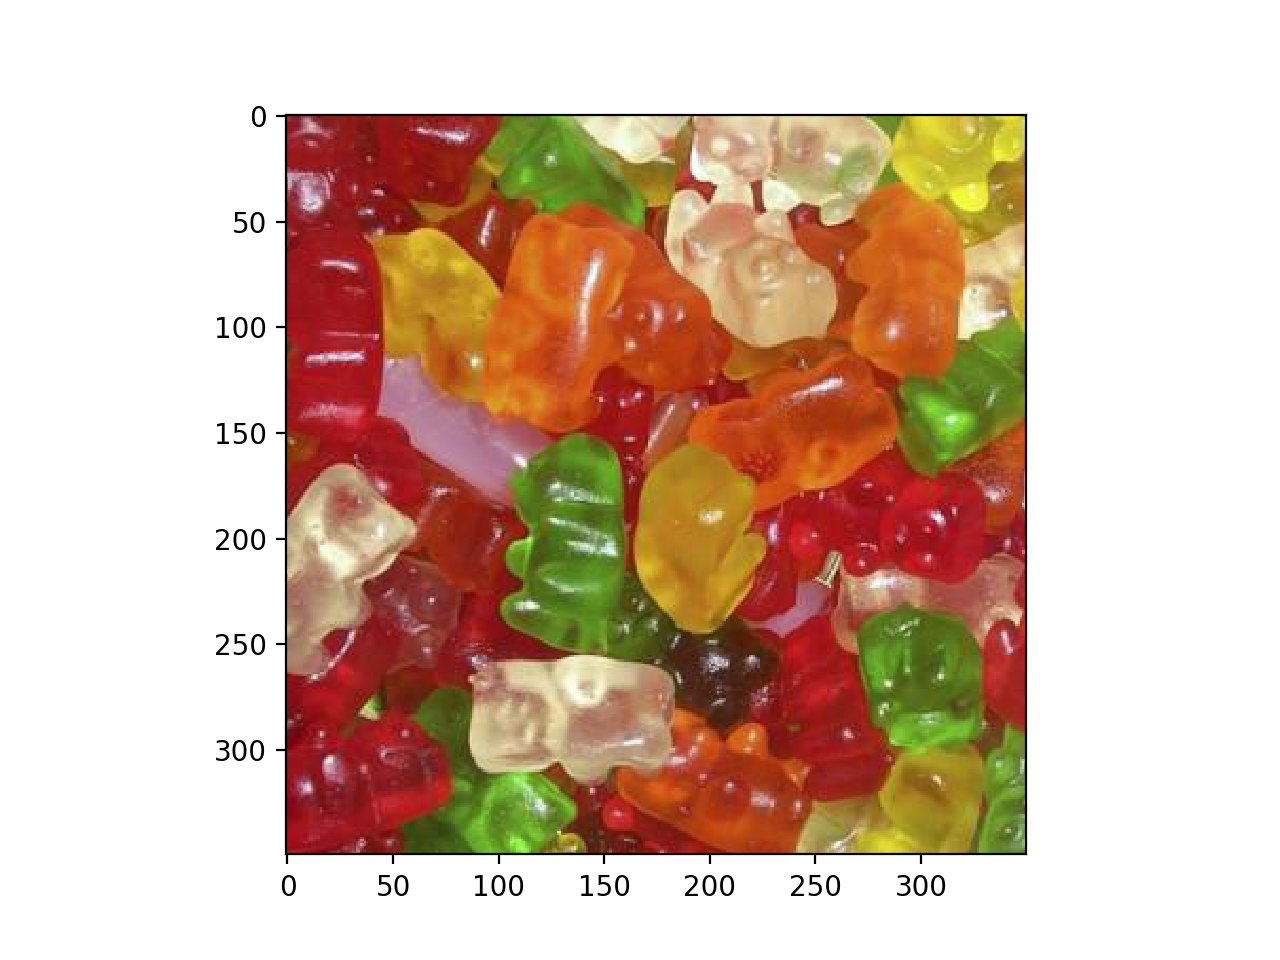

In [42]:
plt.figure()
plt.imshow(img)

Load the stars image:

In [4]:
img = plt.imread('stars.jpg')
type(img)
img.dtype

dtype('uint8')

A UINT8 is an 8-bit unsigned integer (range: 0 through 255 decimal). 

<IPython.core.display.Javascript object>


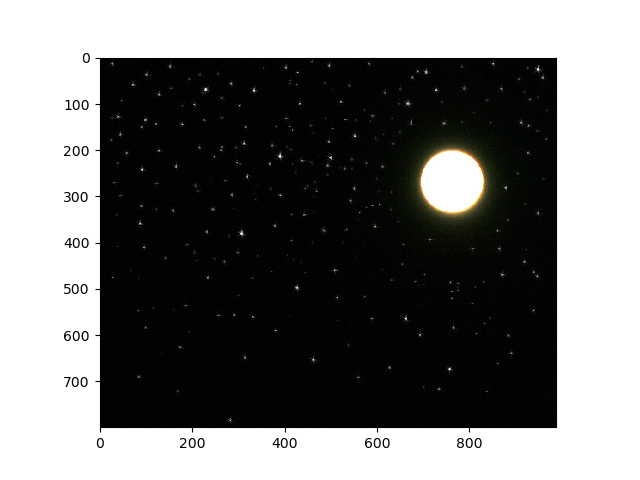

In [5]:
plt.figure()
plt.imshow(img)

* Sum up all color channels to get a grayscale image.
* Sum or average along axis 2
* Rescale the final image to [0.0, 1.0]

In [6]:
img2 = img.mean(-1)
#img2 = img2 - img2.min()
img2 = img2/img2.max()
img2.dtype


dtype('float64')

**Expert question:** Compare the data types of ``img`` and the version of ``img`` that was summed-up along axis 2.

(Determine the datatype of array ``a`` with ``a.dtype()``).

* What does the output mean? The type of data of each array
* Why is it necessary that a different data type is used for the summed-up array? What could happen if the same data type was used?
* Why is it also reasonable to use a different data type when ``np.mean`` is applied instead of ``np.sum``?

Look at the normalized image using ``plt.imshow``. Use the ``vmin`` and ``vmax`` parameters!

<IPython.core.display.Javascript object>


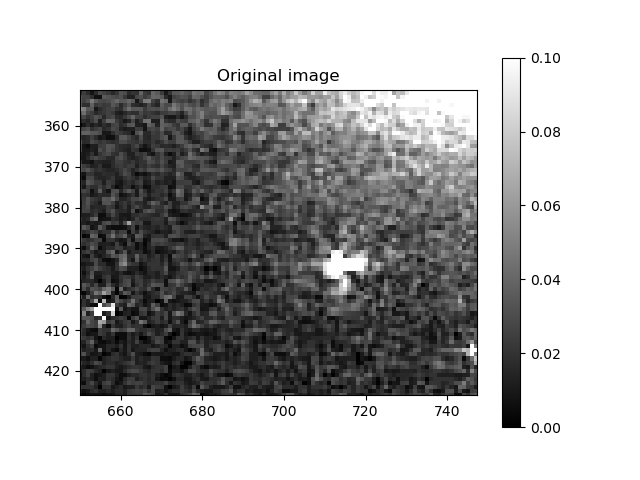

In [7]:
plt.figure()
plt.title('Original image')
plt.imshow(img2, vmin=0, vmax=0.1)
plt.colorbar()

## b) Thresholding

Determine a threshold value that separates the stars from the background.

Apply binary thresholding with different values until you find a value that separates all stars from the background.



**Note:** Set the sign such that the stars have the value ``True`` or ``1``.
This is important for the order of applied morphological operations:
If the thresholding is such that the star areas are ``False``, the order of
binary closing and opening must be interchanged!

In [8]:
threshold = 0.1
img_thr = img2>threshold

<IPython.core.display.Javascript object>


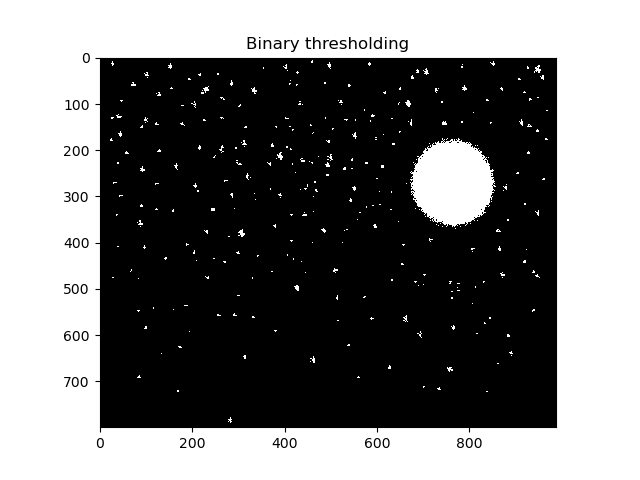

In [9]:
plt.figure()
plt.title('Binary thresholding')
plt.imshow(img_thr)

## c) Morphological operations

**Apply opening and closing** to this binary image to join "fuzzy" areas around stars:

### c.1) Closing

"Closing" is supposed to mean that "holes" (pixels with value 0) are closed.

In other words, the "non-holes" (regions with values 1) grow in size by
applying the kernel on each pixel with value 1.

In [10]:
kernel_closing = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
img_thr_cl = nd.binary_closing(img_thr, structure=kernel_closing)

<IPython.core.display.Javascript object>


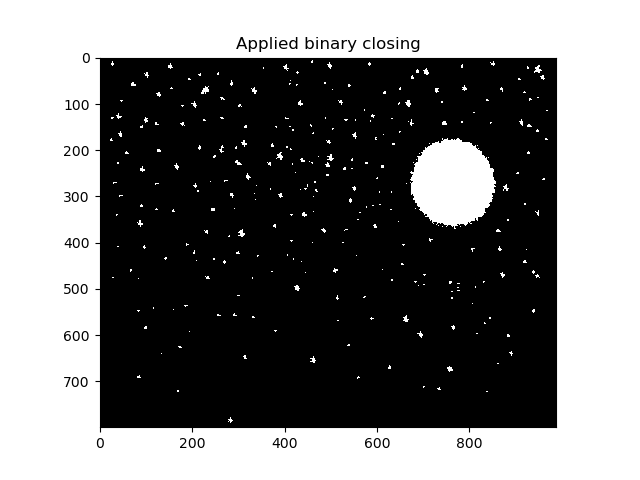

In [11]:
plt.figure()
plt.title('Applied binary closing')
plt.imshow(img_thr_cl)

### c.2) Opening

Remove isolated pixels around the moon by opening with an appropriate kernel

(suggestion: A kernel where only two adjacent pixels are set to `1` eliminates single pixels with value 1!)

In [12]:
(np.ones(2)[None]).shape #None changes shape of array from (2,) to (1,2)

(1, 2)

In [13]:
kernel_opening = np.ones(2)[None] # [1,1] to only consider two adjacent pixels and delete vertical lines of width 1
img_thr_cl_op = nd.binary_opening(img_thr_cl, structure=kernel_opening)

<IPython.core.display.Javascript object>


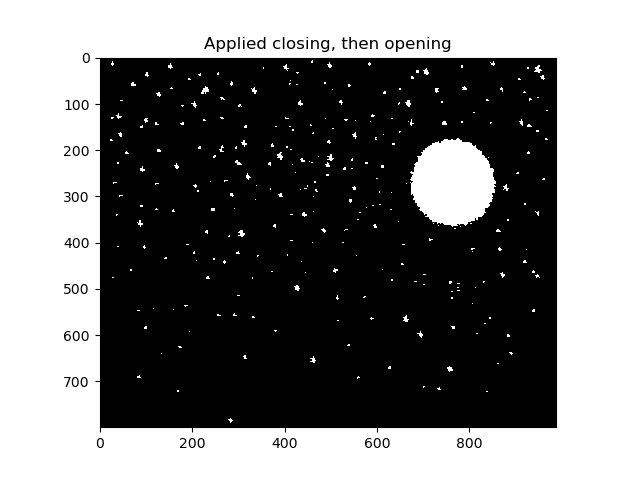

In [14]:
plt.figure()
plt.title('Applied closing, then opening')
plt.imshow(img_thr_cl_op)

### c.3) "Fine-tuning"

Play around with all the morphological options in the `scipy.ndimage` (`nd`)
package to increase the quality of the segmentation (if still needed):

In [15]:
kernel3 = np.ones(2)[:, None]
img_final = nd.binary_opening(img_thr_cl_op, structure=kernel3) # to remove horizontal lines of height one px
# ... and potentially additional operations

<IPython.core.display.Javascript object>


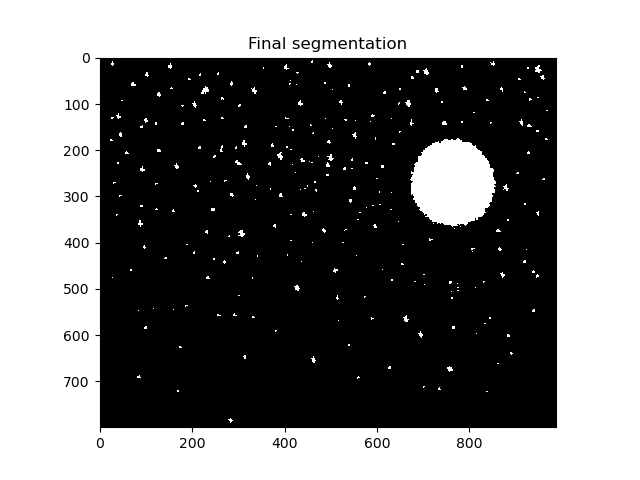

In [16]:
plt.figure()
plt.title('Final segmentation')
plt.imshow(img_final)

<IPython.core.display.Javascript object>


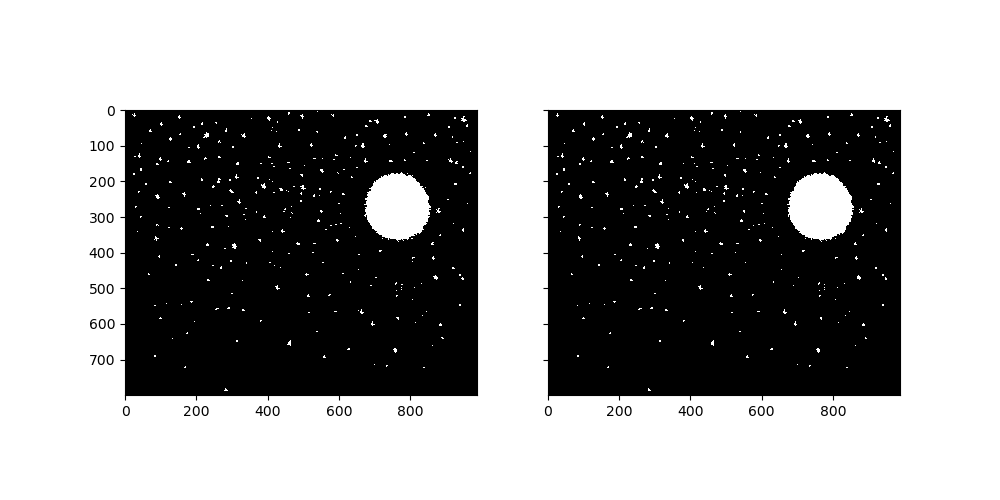

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))
ax1.imshow(img_thr_cl_op)

ax2.imshow(img_final)

## d) Check if you lost any stars!

There are 2 possible issues:
1. Stars were not recognized (false negatives)
2. Noise or artifacts were incorrectly identified as stars (false positives)

Checking for case 1 can e.g. be done by applying the inverted star mask to the original image.
Any bright spots in the resulting image may indicate a failure of masking that particular star.

Case 2 works exactly the other way around: masking the original image with the determined star
mask and identifying anything that doesn't look like a star. It helps to compare it with the
original, unmasked image, and use a lower values for `vmax` so that noise is more apparent.

You may have to zoom in for details.

If you get a lot of false negatives or positives, modify the parameters in c)!

<IPython.core.display.Javascript object>


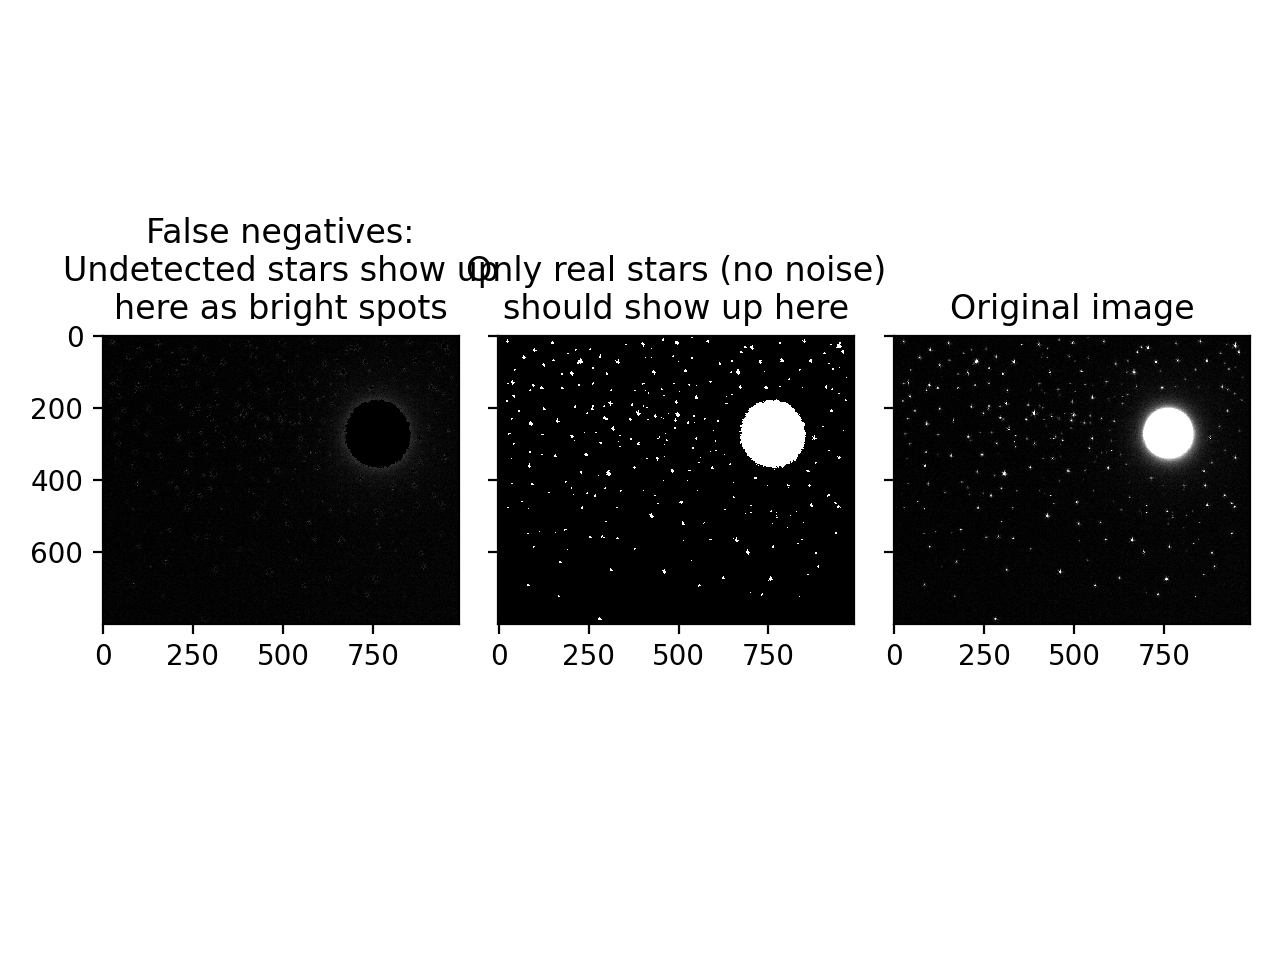

In [18]:
f, [ax1, ax2, ax3] = plt.subplots(1, 3, sharex=True, sharey=True) #set figure and plotting objects 
ax1.imshow(~img_thr_cl_op * img2, vmax=0.5, vmin=0.) #AND operator: if images were equal the result would be 0
ax1.set_title('False negatives:\nUndetected stars show up\nhere as bright spots')

ax2.imshow(img_thr_cl_op, vmax=0.5, vmin=0.)
ax2.set_title('Only real stars (no noise)\nshould show up here')

ax3.imshow(img2, vmax=.5, vmin=0.)
ax3.set_title('Original image')

f.tight_layout()

In [19]:
img_final = img_thr_cl_op

## e) Labeling and analysis of results
Once you're done, **label your image** with ``nd.label``! This "labels" contiguous areas in a binary image with value 1 (i.e., the individual masked stars). The output of the function is an image where every pixel in a contiguous region is assigned a serial number.

In [20]:
img_lbld, N = nd.label(img_final)

Question: **What is `N`**? Check with the documentation of `nd.label`!

*nd.label*: 
Returns

label : ndarray or int
    An integer ndarray where each unique feature in `input` has a unique
    label in the returned array.
num_features : int
    How many objects were found.

<IPython.core.display.Javascript object>


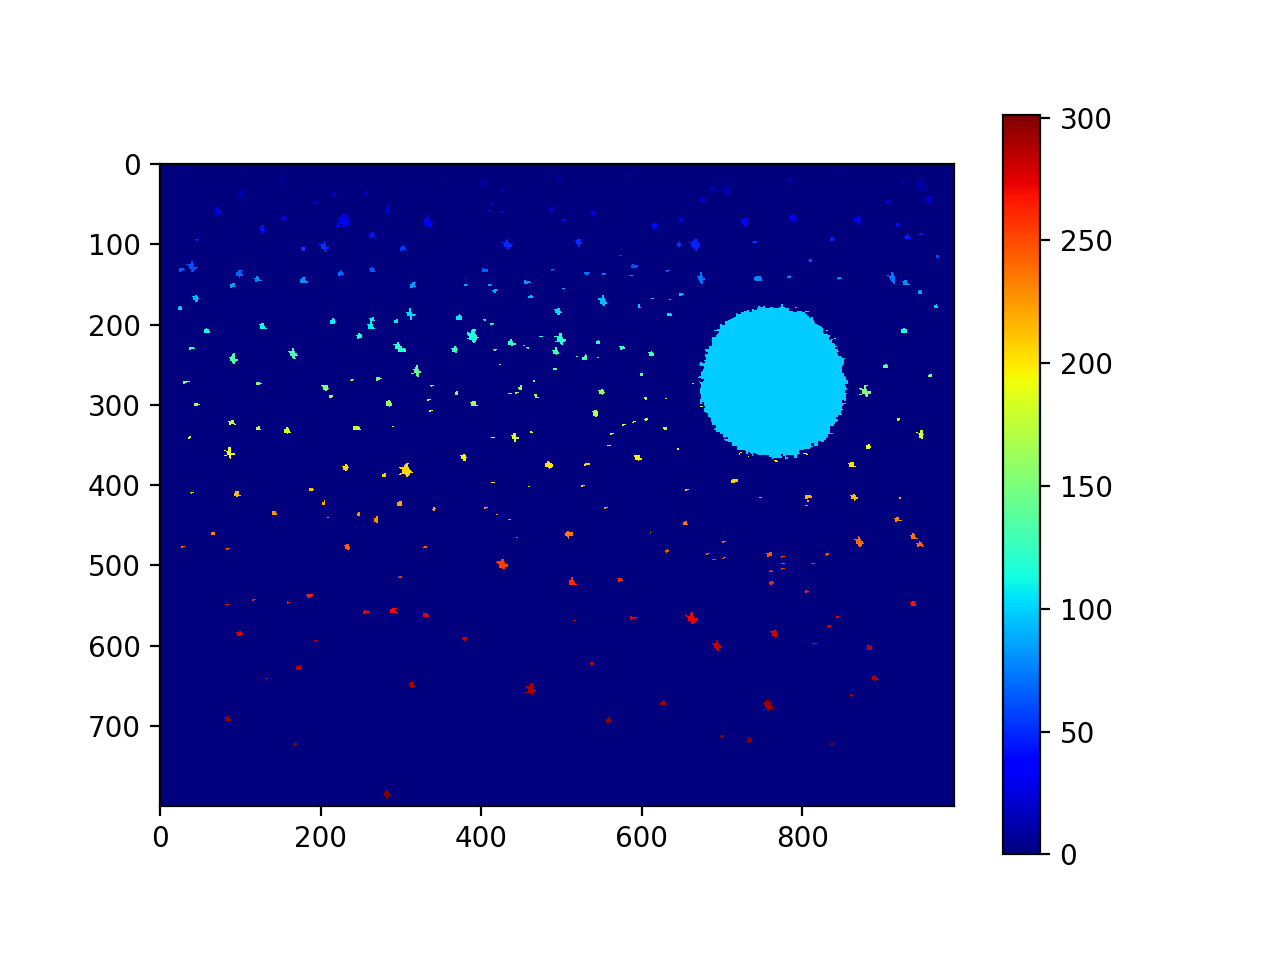

In [22]:
plt.figure()
plt.imshow(img_lbld, cmap='jet')
plt.colorbar()

Use nd.find_objects to return a list of slices through the image for each star:

In [23]:
slice_list = nd.find_objects(img_lbld)

Note: A **slice object** is a slicing operation which exists
independently of an array. So instead of writing

    B = A[100:200, 100:200]
    
you could also write:

    s = (slice(100, 200, None), slice(100, 200, None))
    B = A[s]

or even shorter:

    s = np.s_[100:200, 100:200]
    B = A[s]

One advantage is of course that you could apply identical
slicing to different arrays:

    s = np.s_[100:200, 100:200]
    B = A[s]
    C = D[s]

For a labelled image the function `nd.find_objects` returns a list of such slices `s`,
the n-th slice defining rectangle around the n-th labelled object (i.e., the n-th star).

<IPython.core.display.Javascript object>


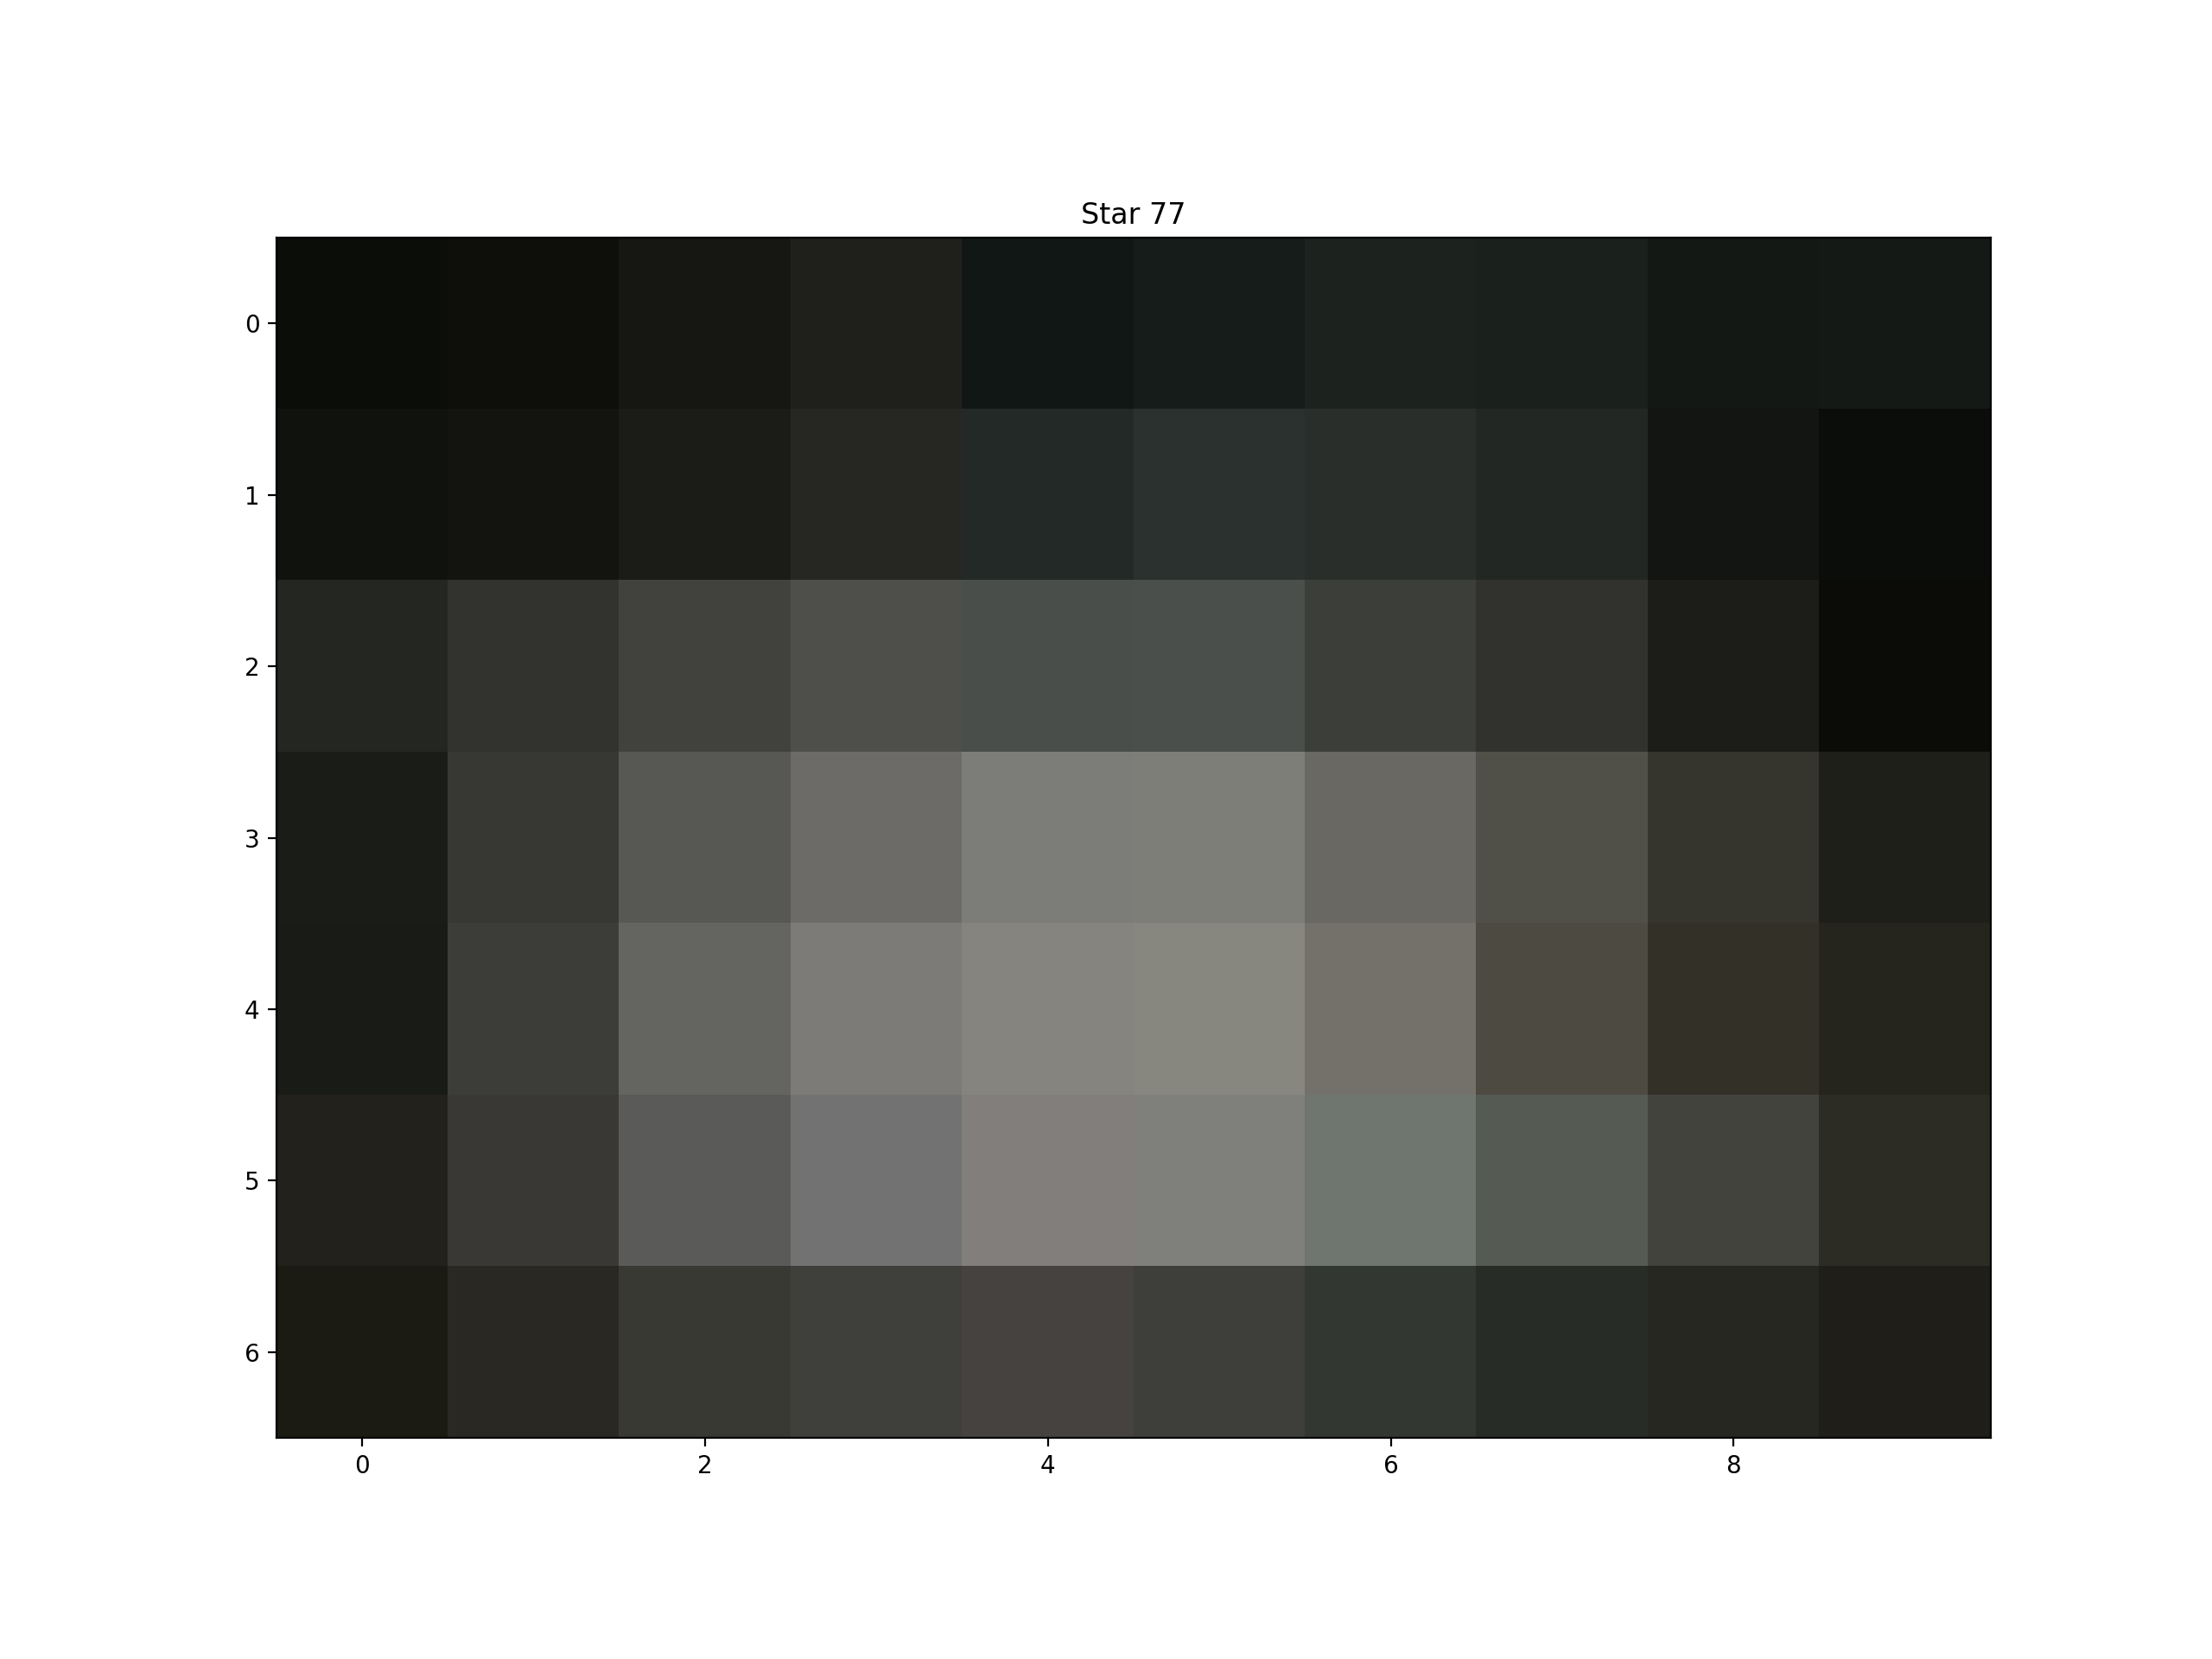

In [24]:
starnum = 77

plt.figure()
plt.title("Star %i" % starnum)
plt.imshow(img[slice_list[starnum]])

Remaining task: Sum up each individual star to get a list of star sizes and
make a detailed histogram (>100 bins). Take care to exclude the moon! This
can be done by sorting the star sizes list and removing the last element

Remember: The slice object ``slice_list[<number>]`` selects one star (either
from the original `img` or the segmented image `img_final`).
Create a list of boolean star images (star_list).
Afterwards, sum their extent up (take care about the datatypes)
to get their sizes and sort the list.

In [25]:
star_list = [img_final[slc] for slc in slice_list]
mass_list = [np.sum(star) for star in star_list]#each star is an array of pixels
mass_list_sorted = np.sort(mass_list)
mass_list_without_moon = mass_list_sorted[:-1]

Note: List comprehensions are a shorter way of writing for loops.

    output = [do_thing(x) for x in list]

does the same as:

    output = []
    for x in list:
        output.append(do_thing(x))

<IPython.core.display.Javascript object>


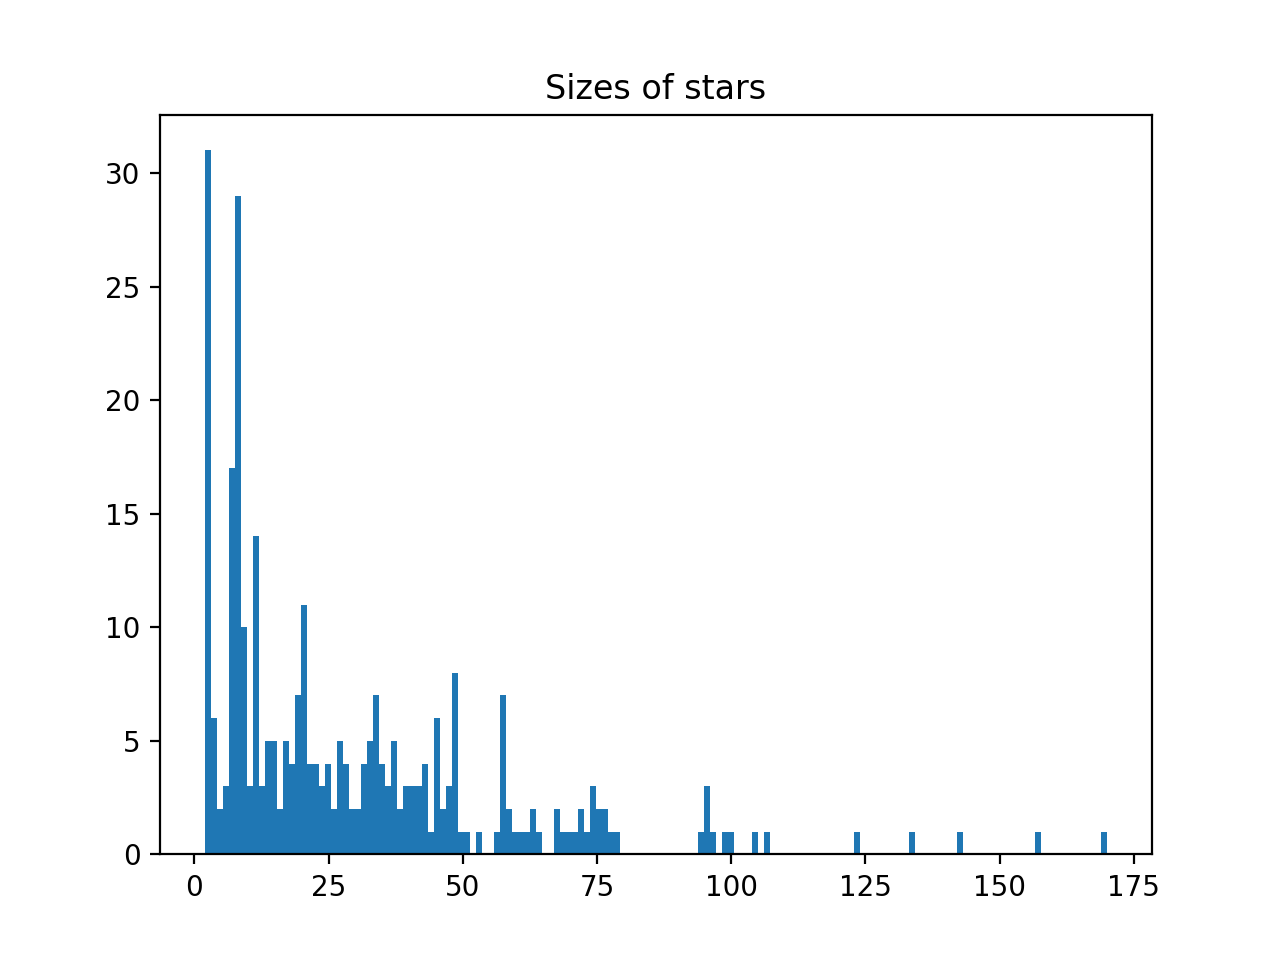

In [28]:
plt.figure()
plt.title("Sizes of stars")
plt.hist(mass_list_without_moon,150);

In [27]:
plt.hist?